# Data Science Challenge Part 1

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Analysis of the first data set

### Importing data

In [2]:
data0_x = pd.read_csv("data0x.csv")
data0_y = pd.read_csv("data0y.csv")

In [3]:
df0 = pd.concat([data0_x, data0_y], sort = False, axis = 1)
df0.head()

,VAR1,VAR2,VAR3,Target
0,8.337952,3.641021,7.700852,15.387785
1,7.903776,9.072297,1.494045,8.247090
2,3.086317,7.566411,2.344412,-0.635292
3,5.361288,4.512669,6.066032,45.384992
4,3.393759,4.890710,9.493635,43.004314


### Data visualization

In [4]:
df0.describe()

,VAR1,VAR2,VAR3,Target
count,100.000000,100.000000,100.000000,100.000000
mean,5.145892,5.139932,4.741929,42.741255
std,2.858015,2.981142,3.329063,9.098350
min,-0.191760,-0.466070,-0.562067,-0.635292
25%,2.963851,2.517258,1.707078,38.403696
50%,5.519984,5.191480,4.966498,43.706151
75%,7.410148,7.503562,7.751413,49.423855
max,9.977110,9.988707,9.999932,58.750764


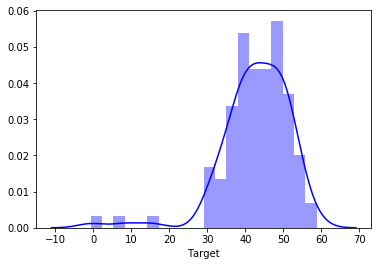

In [5]:
sns.distplot(df0['Target'], bins=20, color='b')

## Task 1: assess the goodness of fit  of the regression model (Linear Regression)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(data0_x, data0_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score_accuracies = cross_val_score(estimator = regressor, X = data0_x, y = data0_y, cv = 10)
print("Cross_val_score accuracy: %.2f"% cross_val_score_accuracies.mean())
cross_val_score_mean = cross_val_score_accuracies.mean()

Cross_val_score accuracy: 0.76


### Splitting the data to evaluate the model

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data0_x, data0_y, test_size = 0.2, random_state = 0)

In [9]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [11]:
scoreFrame = pd.DataFrame([['Linear Regression', cross_val_score_mean, r2, mse]],
                           columns = ['Model', 'cross_val_score', 'r2 score', 'mse'])
scoreFrame

,Model,cross_val_score,r2 score,mse
0,Linear Regression,0.763721,0.505202,70.121953


### Evaluating a different model (Support Vector and Random Forest)

In [12]:
# Support Vector
from sklearn.svm import SVR                  # Import 
svrRegressor = SVR(kernel = 'rbf')           #
svrRegressor.fit(X_train, y_train)           # Fit
y_pred_svr = svrRegressor.predict(X_test)    # Predict

In [13]:
# Evaluation
cross_val_score_mean_svr = cross_val_score(estimator = svrRegressor, X = data0_x, y = data0_y, cv = 10).mean()
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

In [14]:
# Add to scoreFrame
scoreFrame = scoreFrame.append({'Model': 'Support Vector', 'cross_val_score':cross_val_score_mean_svr,
                  'r2 score': r2_svr, 'mse': mse_svr}, ignore_index = True)
scoreFrame

,Model,cross_val_score,r2 score,mse
0,Linear Regression,0.763721,0.505202,70.121953
1,Support Vector,0.079202,0.109215,126.240652


In [15]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor                # Import 
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)   #  
rfr.fit(X_train, y_train)                                         # fit 
y_pred_rfr = rfr.predict(X_test)                                  # predict 

In [16]:
# Evaluation
cross_val_score_mean_rfr = cross_val_score(estimator = rfr, X = data0_x, y = data0_y, cv = 10).mean()
r2_rfr = r2_score(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

In [17]:
# Add to scoreFrame
scoreFrame = scoreFrame.append({'Model': 'Random Forest', 'cross_val_score':cross_val_score_mean_rfr,
                  'r2 score': r2_rfr, 'mse': mse_rfr}, ignore_index = True)

### Final evaluation

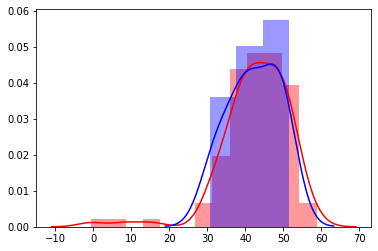

In [18]:
ax1 = sns.distplot(data0_y, color = 'r')
sns.distplot(y_pred, color = 'b', ax = ax1)

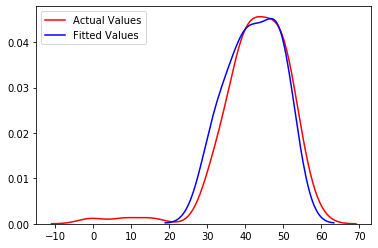

In [19]:
ax1 = sns.distplot(data0_y, hist = False, color = 'r', label = 'Actual Values')
sns.distplot(y_pred, hist = False, color = 'b', label = 'Fitted Values', ax = ax1)

In [20]:
scoreFrame

,Model,cross_val_score,r2 score,mse
0,Linear Regression,0.763721,0.505202,70.121953
1,Support Vector,0.079202,0.109215,126.240652
2,Random Forest,-0.149645,0.422958,81.777466


In [21]:
print("Coeficients of the Linear Regression: {} " .format(regressor.coef_))
print("Constant: {} " .format(regressor.intercept_))

Coeficients of the Linear Regression: [[ 1.77038048 -0.60969338  0.58687348]] 
Constant: [34.20950744] 


# Task 2: are all the variables necessary?  why or why not? if not how would you eliminate variables?

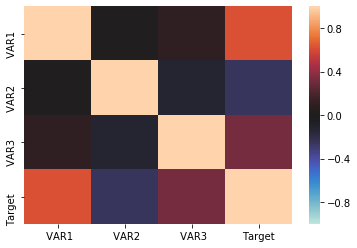

In [22]:
sns.heatmap(df0.corr(), vmin=-1, center = 0) 
# Looking at the heatmap, it looks like all the variables have a significant correlation with the target variable
# positive correlated with var1 and var3. Negative correlated with var2                              

### Adding a column of 1's to use the method of backward eliminations

##### The Linear Regression is: y = C + ax1 + bx2 + cx3, in the data0_x, we have only the independent variables x1, x2, x3. It is necessary to add the  constant to use the method of backward elimination. The library doesn't do it automatically like sklearn does.  

In [23]:
import statsmodels.api as sm
data0_x = np.append(arr = np.ones((data0_x.shape[0], 1)).astype(int), values = data0_x, axis = 1)

In [24]:
for x in range(0,5):
    print(data0_x[x])

[1.       8.337952 3.641021 7.700852]
[1.       7.903776 9.072297 1.494045]
[1.       3.086317 7.566411 2.344412]
[1.       5.361288 4.512669 6.066032]
[1.       3.393759 4.89071  9.493635]


### Now the data has the correct format to use the statsmodels library

In [25]:
X_opt = data0_x[:, [0, 1, 2, 3]]    # At first, using all variables to check its significance
regressor_OLS = sm.OLS(endog= data0_y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     32.84
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           1.08e-14
Time:                        14:03:57   Log-Likelihood:                -326.89
No. Observations:                 100   AIC:                             661.8
Df Residuals:                      96   BIC:                             672.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3719      1.991     16.763      0.000      29.420      37.324
x1             1.9122      0.229      8.336      0.000       1.457       2.368
x2            -0.6934      0.221     -3.143      0.002      -1.131      -0.256
x3             0.6523      0.198      3.287      0.001       0.258       1.046
==============================================================================
Omnibus:                      143.410   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3596.035
Skew:                          -5.365   Prob(JB):                         0.00
Kurtosis:                      30.348   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Setting a significance level of 5% for the P-value, we can't remove any variable. 

#### Trying to remove the greatest P-value and check the Adj. R-squared value

In [26]:
X_opt = data0_x[:, [0, 1, 3]]    # Removing the variable with the greatest P-value (2%) VAR2
regressor_OLS = sm.OLS(endog= data0_y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     40.60
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           1.55e-13
Time:                        14:03:58   Log-Likelihood:                -331.79
No. Observations:                 100   AIC:                             669.6
Df Residuals:                      97   BIC:                             677.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5351      1.643     17.974      0.000      26.274      32.796
x1             1.8934      0.240      7.903      0.000       1.418       2.369
x2             0.7303      0.206      3.551      0.001       0.322       1.139
==============================================================================
Omnibus:                      136.943   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3026.244
Skew:                          -5.027   Prob(JB):                         0.00
Kurtosis:                      28.004   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## After removing the variable with the greatest P-value, the Adj. R-squared dropped from 0.49 to 0.44. Confirming that all the variables are necessary for this model.

# Analysis of the second data set

## Task 1: assess the goodness of fit  of the regression model (Linear Regression)

In [27]:
data1_x = pd.read_csv('data1x.csv')
data1_y = pd.read_csv('data1y.csv')
df1 = pd.concat([data1_x, data1_y], axis = 1, sort = False)
df1.head()

,VAR1,VAR2,VAR3,Target
0,8.337952,8.164432,7.700852,13.126079
1,7.903776,7.261817,1.494045,9.152330
2,3.086317,2.508536,2.344412,1.893645
3,5.361288,5.064384,6.066032,45.109134
4,3.393759,3.355542,9.493635,43.771897


In [28]:
df1.describe()

,VAR1,VAR2,VAR3,Target
count,100.000000,100.000000,100.000000,100.000000
mean,5.145892,4.749056,4.741929,42.936693
std,2.858015,2.892978,3.329063,7.967095
min,-0.191760,-0.941284,-0.562067,1.893645
25%,2.963851,2.293272,1.707078,39.795770
50%,5.519984,5.032488,4.966498,43.814744
75%,7.410148,7.243423,7.751413,47.526571
max,9.977110,9.873541,9.999932,53.847796


In [29]:
regressor2 = LinearRegression(fit_intercept = True)
regressor2.fit(data1_x, data1_y)

cross_val_score2 = cross_val_score(estimator = regressor2, X = data1_x, y = data1_y, cv = 10).mean()
cross_val_score2

0.7135557617877095

In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data1_x, data1_y, test_size = 0.2, random_state = 0)
regressor2.fit(X_train2, y_train2)
y_pred2 = regressor2.predict(X_test2)
r2_score2 = r2_score(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)

### Final evaluation

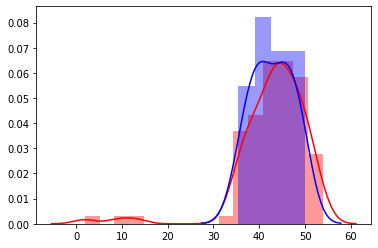

In [31]:
ax1 = sns.distplot(data1_y, color = 'r')
sns.distplot(y_pred2, color = 'b', ax = ax1)

In [32]:
scoreFrame2 = pd.DataFrame([['Linear Regression', cross_val_score2, r2_score2, mse2]], 
                          columns = ['Model', 'cross_val_score', 'r2 score', 'mse'])
scoreFrame2

,Model,cross_val_score,r2 score,mse
0,Linear Regression,0.713556,0.314942,74.541428


In [33]:
print("Coeficients of the Linear Regression: {} " .format(regressor2.coef_))
print("Constant: {} " .format(regressor2.intercept_))

Coeficients of the Linear Regression: [[ 1357214.33442669 -1357213.06141138   102431.73984147]] 
Constant: [-1024277.90613683] 


# Task 2: are all the variables necessary?  why or why not? if not how would you eliminate variables?

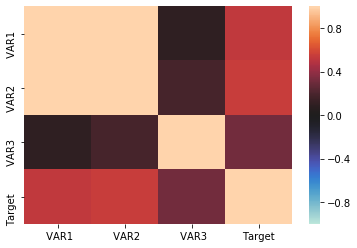

In [34]:
sns.heatmap(df1.corr(), vmin=-1, center = 0) 
# Looking at the heatmap, it looks like all the variables have a significant correlation with the target variable
# positive correlated for all of them                        

In [35]:
data1_x = np.append(arr = np.ones((data1_x.shape[0], 1)).astype(int), values = data1_x, axis = 1)

In [36]:
for i in range(0, 5):
    print(data1_x[i])

[1.       8.337952 8.164432 7.700852]
[1.       7.903776 7.261817 1.494045]
[1.       3.086317 2.508536 2.344412]
[1.       5.361288 5.064384 6.066032]
[1.       3.393759 3.355542 9.493635]


In [37]:
X_opt2 = data1_x[:, [0, 1, 2, 3]]    # At first, using all variables to check its significance
regressor_OLS2 = sm.OLS(endog= data1_y, exog = X_opt2).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     17.32
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           4.55e-09
Time:                        14:04:04   Log-Likelihood:                -327.29
No. Observations:                 100   AIC:                             662.6
Df Residuals:                      96   BIC:                             673.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.496e+04   1.13e+06      0.040      0.968   -2.19e+06    2.28e+06
x1         -5.953e+04   1.49e+06     -0.040      0.968   -3.02e+06     2.9e+06
x2          5.953e+04   1.49e+06      0.040      0.968    -2.9e+06    3.02e+06
x3         -4492.2921   1.13e+05     -0.040      0.968   -2.28e+05    2.19e+05
==============================================================================
Omnibus:                      144.603   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3710.168
Skew:                          -5.429   Prob(JB):                         0.00
Kurtosis:                      30.795   Cond. No.                     3.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.41e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### The p-values are the same and very high. Removing randomly one of them and acessing the summary again

In [38]:
X_opt2 = data1_x[:, [0, 1, 2]]    
regressor_OLS2 = sm.OLS(endog= data1_y, exog = X_opt2).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     26.26
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           7.71e-10
Time:                        14:04:04   Log-Likelihood:                -327.29
No. Observations:                 100   AIC:                             660.6
Df Residuals:                      97   BIC:                             668.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0423      1.764     22.130      0.000      35.541      42.544
x1            -7.0241      2.637     -2.663      0.009     -12.258      -1.790
x2             8.4310      2.605      3.236      0.002       3.260      13.602
==============================================================================
Omnibus:                      144.608   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3710.766
Skew:                          -5.429   Prob(JB):                         0.00
Kurtosis:                      30.797   Cond. No.                         49.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Eliminating the variable of index 3, we could incresce the Adj. R-squared from 0.331 to 0.338
### The variable x1 now has the greatest p-value of 0.009 which is less than the threshold of 5%. 
### If we remove any variable of this model, the Adj. R-squared will start dropping.

In [39]:
X_opt2 = data1_x[:, [0, 2]]    
regressor_OLS2 = sm.OLS(endog= data1_y, exog = X_opt2).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     42.76
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           2.81e-09
Time:                        14:04:05   Log-Likelihood:                -330.82
No. Observations:                 100   AIC:                             665.6
Df Residuals:                      98   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7284      1.289     27.717      0.000      33.170      38.286
x1             1.5178      0.232      6.539      0.000       1.057       1.978
==============================================================================
Omnibus:                      139.029   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3207.393
Skew:                          -5.133   Prob(JB):                         0.00
Kurtosis:                      28.776   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As expected, it dropeed from 0.331 to 0.297. Thus, the previous set of variables, describe better the model. 

# Task 3: are the regressions statistically significant? explain what this means

### The regression aren't statistically significant since its r2 scores are low, 0.5 for the first dataset and 0.3 for the second dataset. Thus, it is difficult to create a trustable model with such a small dataset of only 100 rows. To build a robust and trustable model, a larger dataset is necessary. 